# Twitter data wrangling project 

In [1]:
# importing all needded packages
import pandas as pd
import numpy as np
import tweepy 
import requests
import json
import time
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering data
1. download and open `twitter-archive-enhanced.csv` as pandas dataframe
2. programatically download `image_predictions.tsv` and open it as pandas dataframe.
3. query the Twitter API for each tweet's JSON data using Python's `tweepy` library and store each tweet's entire set of JSON data in a file called  `tweet_json.txt` file.Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) `tweet_id`, `retweet_count` and `favorite_count`

###  1. Manually download and open `twitter-archive-enhanced.csv` as pandas dataframe

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 2. Programmatically download `image_predictions.tsv` and open it as pandas dataframe.

In [3]:
if not os.path.exists('image_predictions.tsv'):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    response = requests.get(url)
    with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)


In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

### testing success of the first two gathering steps

In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. query the Twitter API for each tweet's JSON data using Python's `tweepy` library and store each tweet's entire set of JSON data in a file called  `tweet_json.txt` file.Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with `tweet_id`, `retweet_count` ,`favorite_count` , `retweeted_status` and `has_media` columns

### First: create api object using `tweepy` library

The following cell cantains the code used to creat api object but it was commented because of the removal of secret keys and tokens

In [7]:
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth,
#                  wait_on_rate_limit = True, 
#                  wait_on_rate_limit_notify = True)

### Second: create `twitter_json.txt` file by storing each tweet json data in it's own line

In [8]:
if not os.path.exists('twitter_json.txt'):
    errors = []
    # getting each tweet json data and appending it 'twitter_json.txt' file
    # each tweet json data in seperate line
    for tweet_id in twitter_archive.tweet_id:
        start = time.time()
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            with open('twitter_json.txt','a') as outfile:
                outfile.write(json.dumps(tweet._json))
                outfile.write('\n')
            print(tweet_id)
        except:
            errors.append(tweet_id)
            print('{} not found'.format(tweet_id))
        end = time.time()
        # printing time required to gather each tweet data to monitor the gathering process
        print('time required = {}'.format(end-start))
    # prints number of errors occurred due to tweets have been deleted 
    print('there is {} tweets were deleted'.format(len(errors)))

### Third: create a data frame with information requiered about each tweet 

In [9]:
# creating an empty list in which i will store the required information to
# create the data frame
df_list = []
with open('twitter_json.txt') as json_file:
    #reading the file line by line
    for tweeta in json_file:
        # converting each line of the file into dict object 
        tweeta = json.loads(tweeta)
        # getting information required
        tweet_id = tweeta['id_str']
        retweet_count =  tweeta['retweet_count']
        favorite_count = tweeta['favorite_count']
        # getting hashtags if found
        try:
            hashtag = tweeta['entities']['hashtags'][0]['text']
        except:
            hashtag = np.nan
        # whether tweet had media or not
        try:
            media = tweeta['entities']['media']
            media = 'true'
        except:
            media = 'false'
        # to determine whether the tweet is original or a retweet
        if tweeta.get('retweeted_status', 'original tweet') == 'original tweet':
            retweeted_status = 'original tweet'
        else:
            retweeted_status = 'retweet'
        # creating a dictionary with required information and 
        # appending it to the list evantually used to create the data frame
        df_list.append({'tweet_id': tweet_id,
                       'favorite_count': int(favorite_count),
                       'retweet_count': int(retweet_count),
                       'retweeted_status': retweeted_status,
                       'has_media': media,
                       'hashtag': hashtag})  
# creating 'tweet_json' data frame
tweet_json = pd.DataFrame(df_list, 
                          columns=['tweet_id',
                                   'favorite_count',
                                   'retweet_count',
                                   'retweeted_status',
                                   'has_media',
                                   'hashtag'])

### Testing success of gathering required data using twitter api

In [10]:
tweet_json.sample(20)

,tweet_id,favorite_count,retweet_count,retweeted_status,has_media,hashtag
1874,674670581682434048,1533,610,original tweet,true,NaN
1834,675497103322386432,3002,1230,original tweet,true,NaN
2233,667724302356258817,452,297,original tweet,true,NaN
2087,670435821946826752,996,481,original tweet,true,NaN
188,854732716440526848,21789,5750,original tweet,true,NaN
998,746542875601690625,4946,1842,original tweet,false,NaN
2239,667538891197542400,191,60,original tweet,true,NaN
800,770093767776997377,0,3030,retweet,true,NaN
1462,693109034023534592,1672,595,original tweet,true,NaN
1375,699691744225525762,10071,4499,original tweet,true,NaN


## Assessing data collected

### First: `twitter_archive`

#### Visual assessment

In [11]:
# viewing random sample of twitter_archive data frame
twitter_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1699,680970795137544192,NaN,NaN,2015-12-27 04:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I thought I made this very clear. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680970795...,9,10,None,None,None,None,None
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,None,None,None
1422,698178924120031232,NaN,NaN,2016-02-12 16:16:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lily. She accidentally dropped all her...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698178924...,10,10,Lily,None,None,None,None
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
436,820314633777061888,NaN,NaN,2017-01-14 17:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We are proud to support @LoveYourMelon on thei...,NaN,NaN,NaN,"https://www.loveyourmelon.com/pages/ourstory,h...",14,10,None,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
1015,747103485104099331,NaN,NaN,2016-06-26 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys... I said DOGS with ""shark qualities"" or ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/747103485...,11,10,None,None,None,None,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None
579,800513324630806528,NaN,NaN,2016-11-21 01:37:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chef. Chef loves everyone and wants ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800513324...,11,10,Chef,None,None,None,None


1. there are some tweets without images(nan values in `expanded_urls` column)
2. there are some retweets (because there is values other than nan in the `retweeted_` columns)

#### Programmatic assessment

In [12]:
# summay of shape, columns, non-null values and data types
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# checking for null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
#checking for dublicates
twitter_archive.tweet_id.duplicated().any()

False

In [15]:
#checking values in the name column
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Eriq         1
Godi         1
Cora         1
BeBe         1
Beemo        1
Name: name, Length: 957, dtype: int64

###### it seems that some names were wrong, so let's dive deeper

In [16]:
np.sort(twitter_archive.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

##### It seems that lowercase names are wrong so further investigation is required

In [17]:
pd.set_option('display.max_colwidth', -1)
twitter_archive.loc[twitter_archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


##### It seems that collecting names from text didn't go very well.because it didn't capture all patterns

#### checking values in the `rating_numerator` column

In [18]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

##### some numerator seems suspicious because most of the ratings lies between 4 and 14 ,and we have much larger values and very small values..so let's look at these outliers

In [19]:
# isolating rating_numerator outliers in order to have a closer look
twitter_archive.query('rating_numerator > 14 or rating_numerator < 4')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,47384430.0,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,"https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1,https://twitter.com/KibaDva/status/838905980628819968/photo/1",15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507551481857/photo/1,2,10,quite,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3,10,a,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None


* most of very small rating numerator are right but tweet with id `675153376133427200` had a rating numurator of 1 because the picture didn't have a dog.
* very large rating numerator is usually right because the picture had alot of dogs or because 'they are good dogs brant'
* tweet with id `835246439529840640` it's rating was miss interpreted but it wouldn't matter because it had no picture and we will not use it in analysis
* tweet with id `835152434251116546` had a rating of zero because it wasn't a real rating for the dog but because it was to make a point about some other page that copied one of `we rate dogs` tweeets 
* tweet with id `835152434251116546`is not a real rating tweet
* some ratings contain decimal numbers which lead to wrong rating numerator

In [20]:
# chicking if the actual tweet that tweet '835152434251116546' was about is in the
# twitter_archive
twitter_archive.query('rating_numerator == 11 and name == "None" and puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
947,752519690950500352,NaN,NaN,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Hopefully this puppo on a swing will help get you through your Monday. 11/10 would push https://t.co/G54yClasz2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/752519690950500352/photo/1,https://twitter.com/dog_rates/status/752519690950500352/photo/1,https://twitter.com/dog_rates/status/752519690950500352/photo/1",11,10,None,None,None,None,puppo


In [21]:
# displaying all ratings with decimal numbers
twitter_archive[twitter_archive['text'].str.contains(r'(\d+\.\d+\/\d+)')]

C:\Users\Mr. X\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


#### Checking `rating_denominator` values

In [22]:
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

#### `rating_denominator` should have a value of ten, so these results is confusing so further investigation is required.

In [23]:
# isolating rating_denominator that have a value other than ten
denominator_not_ten = twitter_archive.query('rating_denominator != 10')
denominator_not_ten

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [24]:
# how many demominators with values other than ten
denominator_not_ten.shape

(23, 17)

### checking all 23 tweets with denominator other than ten

1. tweet with id  `835246439529840640`

In [25]:
# veiwing text,numerator,denominator,url
print(twitter_archive.query('tweet_id == 835246439529840640').text)
print(twitter_archive.query('tweet_id == 835246439529840640').expanded_urls)
print(twitter_archive.query('tweet_id == 835246439529840640').rating_numerator)
print(twitter_archive.query('tweet_id == 835246439529840640').rating_denominator)

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object
313    NaN
Name: expanded_urls, dtype: object
313    960
Name: rating_numerator, dtype: int64
313    0
Name: rating_denominator, dtype: int64


It doesn't have a photo so it won't matter

2. tweet with id  `832088576586297345`

In [26]:
print(twitter_archive.query('tweet_id == 832088576586297345').text)
print(twitter_archive.query('tweet_id == 832088576586297345').expanded_urls)
print(twitter_archive.query('tweet_id == 832088576586297345').rating_numerator)
print(twitter_archive.query('tweet_id == 832088576586297345').rating_denominator)

342    @docmisterio account started on 11/15/15
Name: text, dtype: object
342    NaN
Name: expanded_urls, dtype: object
342    11
Name: rating_numerator, dtype: int64
342    15
Name: rating_denominator, dtype: int64


This tweet was not an actual rating but the algorithm didn't capture that this is a date not  a rating.
But it won't matter because it didn't have a photo(already identified)

3. tweet with id  `820690176645140481`

In [27]:
print(twitter_archive.query('tweet_id == 820690176645140481').text)
print(twitter_archive.query('tweet_id == 820690176645140481').expanded_urls)
print(twitter_archive.query('tweet_id == 820690176645140481').rating_numerator)
print(twitter_archive.query('tweet_id == 820690176645140481').rating_denominator)

433    The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Name: text, dtype: object
433    https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1
Name: expanded_urls, dtype: object
433    84
Name: rating_numerator, dtype: int64
433    70
Name: rating_denominator, dtype: int64


This tweet is correct

4. tweet with id  `810984652412424192`

In [28]:
print(twitter_archive.query('tweet_id == 810984652412424192').text)
print(twitter_archive.query('tweet_id == 810984652412424192').expanded_urls)
print(twitter_archive.query('tweet_id == 810984652412424192').rating_numerator)
print(twitter_archive.query('tweet_id == 810984652412424192').rating_denominator)

516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object
516    https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1
Name: expanded_urls, dtype: object
516    24
Name: rating_numerator, dtype: int64
516    7
Name: rating_denominator, dtype: int64


this tweet is identified correctly

5. tweet with id  `775096608509886464`

In [29]:
print(twitter_archive.query('tweet_id == 775096608509886464').text)
print(twitter_archive.query('tweet_id == 775096608509886464').expanded_urls)
print(twitter_archive.query('tweet_id == 775096608509886464').rating_numerator)
print(twitter_archive.query('tweet_id == 775096608509886464').rating_denominator)

784    RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Name: text, dtype: object
784    https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1
Name: expanded_urls, dtype: object
784    9
Name: rating_numerator, dtype: int64
784    11
Name: rating_denominator, dtype: int64


This is a retweet  (already identified)

6. tweet with id  `758467244762497024`

In [30]:
print(twitter_archive.query('tweet_id == 758467244762497024').text)
print(twitter_archive.query('tweet_id == 758467244762497024').expanded_urls)
print(twitter_archive.query('tweet_id == 758467244762497024').rating_numerator)
print(twitter_archive.query('tweet_id == 758467244762497024').rating_denominator)

902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
902    https://twitter.com/dog_rates/status/758467244762497024/video/1
Name: expanded_urls, dtype: object
902    165
Name: rating_numerator, dtype: int64
902    150
Name: rating_denominator, dtype: int64


This tweet is identified correctly but it had a video of multiple dogs 

7. tweet with id  `740373189193256964`

In [31]:
print(twitter_archive.query('tweet_id == 740373189193256964').text)
print(twitter_archive.query('tweet_id == 740373189193256964').expanded_urls)
print(twitter_archive.query('tweet_id == 740373189193256964').rating_numerator)
print(twitter_archive.query('tweet_id == 740373189193256964').rating_denominator)

1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Name: text, dtype: object
1068    https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1
Name: expanded_urls, dtype: object
1068    9
Name: rating_numerator, dtype: int64
1068    11
Name: rating_denominator, dtype: int64


The algorithm used to find ratings misinterpreted this tweet because it had a date.
The correct rating is 14/10

8. tweet with id  `731156023742988288`

In [32]:
print(twitter_archive.query('tweet_id == 731156023742988288').text)
print(twitter_archive.query('tweet_id == 731156023742988288').expanded_urls)
print(twitter_archive.query('tweet_id == 731156023742988288').rating_numerator)
print(twitter_archive.query('tweet_id == 731156023742988288').rating_denominator)

1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object
1120    https://twitter.com/dog_rates/status/731156023742988288/photo/1
Name: expanded_urls, dtype: object
1120    204
Name: rating_numerator, dtype: int64
1120    170
Name: rating_denominator, dtype: int64


this tweet was identified correctly.(many doggs)

9. tweet with id  `722974582966214656`

In [33]:
print(twitter_archive.query('tweet_id == 722974582966214656').text)
print(twitter_archive.query('tweet_id == 722974582966214656').expanded_urls)
print(twitter_archive.query('tweet_id == 722974582966214656').rating_numerator)
print(twitter_archive.query('tweet_id == 722974582966214656').rating_denominator)

1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Name: text, dtype: object
1165    https://twitter.com/dog_rates/status/722974582966214656/photo/1
Name: expanded_urls, dtype: object
1165    4
Name: rating_numerator, dtype: int64
1165    20
Name: rating_denominator, dtype: int64


The algorithm used to find ratings misinterpreted this tweet because it had a date. The correct rating is 13/10

10. tweet with id `716439118184652801`

In [34]:
print(twitter_archive.query('tweet_id == 716439118184652801').text)
print(twitter_archive.query('tweet_id == 716439118184652801').expanded_urls)
print(twitter_archive.query('tweet_id == 716439118184652801').rating_numerator)
print(twitter_archive.query('tweet_id == 716439118184652801').rating_denominator)

1202    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Name: text, dtype: object
1202    https://twitter.com/dog_rates/status/716439118184652801/photo/1
Name: expanded_urls, dtype: object
1202    50
Name: rating_numerator, dtype: int64
1202    50
Name: rating_denominator, dtype: int64


The algorithm used to find ratings misinterpreted this tweet.
The actual rating is 11/10

11. tweet with id `713900603437621249`

In [35]:
print(twitter_archive.query('tweet_id == 713900603437621249').text)
print(twitter_archive.query('tweet_id == 713900603437621249').expanded_urls)
print(twitter_archive.query('tweet_id == 713900603437621249').rating_numerator)
print(twitter_archive.query('tweet_id == 713900603437621249').rating_denominator)

1228    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Name: text, dtype: object
1228    https://twitter.com/dog_rates/status/713900603437621249/photo/1
Name: expanded_urls, dtype: object
1228    99
Name: rating_numerator, dtype: int64
1228    90
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

12. tweet with id `710658690886586372`

In [36]:
print(twitter_archive.query('tweet_id == 710658690886586372').text)
print(twitter_archive.query('tweet_id == 710658690886586372').expanded_urls)
print(twitter_archive.query('tweet_id == 710658690886586372').rating_numerator)
print(twitter_archive.query('tweet_id == 710658690886586372').rating_denominator)

1254    Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
Name: text, dtype: object
1254    https://twitter.com/dog_rates/status/710658690886586372/photo/1
Name: expanded_urls, dtype: object
1254    80
Name: rating_numerator, dtype: int64
1254    80
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

13. tweet with id `709198395643068416`

In [37]:
print(twitter_archive.query('tweet_id == 709198395643068416').text)
print(twitter_archive.query('tweet_id == 709198395643068416').expanded_urls)
print(twitter_archive.query('tweet_id == 709198395643068416').rating_numerator)
print(twitter_archive.query('tweet_id == 709198395643068416').rating_denominator)

1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Name: text, dtype: object
1274    https://twitter.com/dog_rates/status/709198395643068416/photo/1
Name: expanded_urls, dtype: object
1274    45
Name: rating_numerator, dtype: int64
1274    50
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

14. tweet with id `704054845121142784`

In [38]:
print(twitter_archive.query('tweet_id == 704054845121142784').text)
print(twitter_archive.query('tweet_id == 704054845121142784').expanded_urls)
print(twitter_archive.query('tweet_id == 704054845121142784').rating_numerator)
print(twitter_archive.query('tweet_id == 704054845121142784').rating_denominator)

1351    Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Name: text, dtype: object
1351    https://twitter.com/dog_rates/status/704054845121142784/photo/1
Name: expanded_urls, dtype: object
1351    60
Name: rating_numerator, dtype: int64
1351    50
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

15. tweet with id `697463031882764288`

In [39]:
print(twitter_archive.query('tweet_id == 697463031882764288').text)
print(twitter_archive.query('tweet_id == 697463031882764288').expanded_urls)
print(twitter_archive.query('tweet_id == 697463031882764288').rating_numerator)
print(twitter_archive.query('tweet_id == 697463031882764288').rating_denominator)

1433    Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
Name: text, dtype: object
1433    https://twitter.com/dog_rates/status/697463031882764288/photo/1
Name: expanded_urls, dtype: object
1433    44
Name: rating_numerator, dtype: int64
1433    40
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

16. tweet with id `686035780142297088`

In [40]:
print(twitter_archive.query('tweet_id == 686035780142297088').text)
print(twitter_archive.query('tweet_id == 686035780142297088').expanded_urls)
print(twitter_archive.query('tweet_id == 686035780142297088').rating_numerator)
print(twitter_archive.query('tweet_id == 686035780142297088').rating_denominator)

1598    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
Name: text, dtype: object
1598    NaN
Name: expanded_urls, dtype: object
1598    4
Name: rating_numerator, dtype: int64
1598    20
Name: rating_denominator, dtype: int64


This tweet had no pictures(already identified)

17. tweet with id `684225744407494656`

In [41]:
print(twitter_archive.query('tweet_id == 684225744407494656').text)
print(twitter_archive.query('tweet_id == 684225744407494656').expanded_urls)
print(twitter_archive.query('tweet_id == 684225744407494656').rating_numerator)
print(twitter_archive.query('tweet_id == 684225744407494656').rating_denominator)

1634    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
Name: text, dtype: object
1634    https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1
Name: expanded_urls, dtype: object
1634    143
Name: rating_numerator, dtype: int64
1634    130
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

18. tweet with id `684222868335505415`

In [42]:
print(twitter_archive.query('tweet_id == 684222868335505415').text)
print(twitter_archive.query('tweet_id == 684222868335505415').expanded_urls)
print(twitter_archive.query('tweet_id == 684222868335505415').rating_numerator)
print(twitter_archive.query('tweet_id == 684222868335505415').rating_denominator)

1635    Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
Name: text, dtype: object
1635    https://twitter.com/dog_rates/status/684222868335505415/photo/1
Name: expanded_urls, dtype: object
1635    121
Name: rating_numerator, dtype: int64
1635    110
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

19. tweet with id `682962037429899265`

In [43]:
print(twitter_archive.query('tweet_id == 682962037429899265').text)
print(twitter_archive.query('tweet_id == 682962037429899265').expanded_urls)
print(twitter_archive.query('tweet_id == 682962037429899265').rating_numerator)
print(twitter_archive.query('tweet_id == 682962037429899265').rating_denominator)

1662    This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Name: text, dtype: object
1662    https://twitter.com/dog_rates/status/682962037429899265/photo/1
Name: expanded_urls, dtype: object
1662    7
Name: rating_numerator, dtype: int64
1662    11
Name: rating_denominator, dtype: int64


The algorithm used to find ratings misinterpreted this tweet. The actual rating is 10/10

20. tweet with id `682808988178739200	`

In [44]:
print(twitter_archive.query('tweet_id == 682808988178739200').text)
print(twitter_archive.query('tweet_id == 682808988178739200').expanded_urls)
print(twitter_archive.query('tweet_id == 682808988178739200').rating_numerator)
print(twitter_archive.query('tweet_id == 682808988178739200').rating_denominator)

1663    I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
Name: text, dtype: object
1663    NaN
Name: expanded_urls, dtype: object
1663    20
Name: rating_numerator, dtype: int64
1663    16
Name: rating_denominator, dtype: int64


This wasn't a rating tweet but it had no pictures(already identified)

21. tweet with id `677716515794329600`

In [45]:
print(twitter_archive.query('tweet_id == 677716515794329600').text)
print(twitter_archive.query('tweet_id == 677716515794329600').expanded_urls)
print(twitter_archive.query('tweet_id == 677716515794329600').rating_numerator)
print(twitter_archive.query('tweet_id == 677716515794329600').rating_denominator)

1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object
1779    https://twitter.com/dog_rates/status/677716515794329600/photo/1
Name: expanded_urls, dtype: object
1779    144
Name: rating_numerator, dtype: int64
1779    120
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

22. tweet with id `675853064436391936`

In [46]:
print(twitter_archive.query('tweet_id == 675853064436391936').text)
print(twitter_archive.query('tweet_id == 675853064436391936').expanded_urls)
print(twitter_archive.query('tweet_id == 675853064436391936').rating_numerator)
print(twitter_archive.query('tweet_id == 675853064436391936').rating_denominator)

1843    Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
Name: text, dtype: object
1843    https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1
Name: expanded_urls, dtype: object
1843    88
Name: rating_numerator, dtype: int64
1843    80
Name: rating_denominator, dtype: int64


This tweet was identified correctly(many dogs)

23. tweet with id `666287406224695296`

In [47]:
print(twitter_archive.query('tweet_id == 666287406224695296').text)
print(twitter_archive.query('tweet_id == 666287406224695296').expanded_urls)
print(twitter_archive.query('tweet_id == 666287406224695296').rating_numerator)
print(twitter_archive.query('tweet_id == 666287406224695296').rating_denominator)

2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object
2335    https://twitter.com/dog_rates/status/666287406224695296/photo/1
Name: expanded_urls, dtype: object
2335    1
Name: rating_numerator, dtype: int64
2335    2
Name: rating_denominator, dtype: int64


The algorithm used to find ratings misinterpreted this tweet. The actual rating is 9/10

## Checking values in dog stage columns

In [48]:
# doggo
twitter_archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [49]:
# pupper
twitter_archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [50]:
# floofer
twitter_archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [51]:
# puppo
twitter_archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [52]:
# whether or not theres are tweets with no dog stage information at all 
no_stage = twitter_archive.query('doggo == "None" and pupper == "None" and floofer == "None" and puppo == "None"')
no_stage.shape

(1976, 17)

There is no dog stage information for 1976 tweets

In [53]:
# tweets with dog stage
with_stages = twitter_archive.query('doggo != "None" or pupper != "None" or floofer != "None" or puppo != "None"').copy()
with_stages.shape

(380, 17)

### Checking if any tweet had more than one dog stage

In [54]:
# checking if a tweet had doggo and pupper dog stages together
with_stages.query('doggo == "doggo" and pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

* tweet with id `817777686764523521` correct dog stage is `pupper`
* tweet with id `808106460588765185` had two dogs
* tweet with id `802265048156610565` had two dogs
* tweet with id `801115127852503040` correct dog stage is `doggo`
* tweet with id `785639753186217984` correct dog stage is `doggo`
* tweet with id `781308096455073793` had two dogs
* tweet with id `775898661951791106` is a retweet (already addressed)
* tweet with id `770093767776997377` is a retweet (already addressed)
* tweet with id `759793422261743616` had two dogs
* tweet with id `751583847268179968` correct dog stage is `None`
* tweet with id `741067306818797568` had two dogs
* tweet with id `733109485275860992` had two dogs

In [55]:
# checking if a tweet had doggo and floofer dog stages together
with_stages.query('doggo == "doggo" and floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


* tweet with id `854010172552949760` correct dog stage is `floofer`

In [56]:
# checking if a tweet had doggo and puppo dog stages together
with_stages.query('doggo == "doggo" and puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


tweet with id `855851453814013952` correct dog stage is `puppo`

## Assessment of image_predictions data frame

### First: visual assessment

In [57]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,1,pug,0.883952,True,Boston_bull,0.011057,True,French_bulldog,0.009840,True
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
2053,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True
1560,793271401113350145,https://pbs.twimg.com/media/CwJEIKTWYAAvL-T.jpg,1,Siberian_husky,0.231695,True,Eskimo_dog,0.206749,True,Pembroke,0.070120,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
1393,767191397493538821,https://pbs.twimg.com/media/CqWcgcqWcAI43jm.jpg,1,patio,0.708665,False,boathouse,0.110056,False,pier,0.039532,False


### dog breeds are not consistent (lowercase and uppercase)

### Second: programmatic assessment

In [58]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [59]:
# checking for any null values
image_predictions.isnull().any().any()

False

In [60]:
# checking for dublicates
image_predictions.tweet_id.duplicated().any()

False

## Assessment of tweet_json data frame

### First: visual assessment

In [61]:
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,retweeted_status,has_media,hashtag
681,786286427768250368,7971,2843,original tweet,false,NaN
1522,689283819090870273,3195,1073,original tweet,true,NaN
773,773547596996571136,21987,6108,original tweet,true,NaN
763,775364825476165632,7355,2946,original tweet,true,NaN
782,772193107915964416,6007,1381,original tweet,true,NaN
2236,667549055577362432,5425,2098,original tweet,true,NaN
670,787810552592695296,8626,3057,original tweet,true,NaN
825,766078092750233600,0,2593,retweet,true,NaN
1245,709519240576036864,1462,231,original tweet,true,NaN
1085,733828123016450049,3496,759,original tweet,true,NaN


### Second: programmatic assessment

In [62]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
retweeted_status    2331 non-null object
has_media           2331 non-null object
hashtag             27 non-null object
dtypes: int64(2), object(4)
memory usage: 109.4+ KB


In [63]:
#checking for null values
tweet_json.isnull().any()

tweet_id            False
favorite_count      False
retweet_count       False
retweeted_status    False
has_media           False
hashtag             True 
dtype: bool

In [64]:
#checking for dublicates
tweet_json.tweet_id.duplicated().any()

False

## Quality issues:
<ul> 
<li>`twitter_archive` data frame:
 <ul>
 <li>there are some tweets without images(nan values in `expanded_urls` column)
 <li>there are some retweets (because there is values other than nan in the `retweeted_` columns)
 <li>wrong data types for `tweet_id` and `timestamp` columns
 <li>`name` column has 745 None values
 <li>wrong lowercase names in the `name` column (not all patterns were captured)
 <li> some ratings had decimal numbers
 <li> wrong rating numerator and denominator<ol>
<li>tweet with id 675153376133427200 had a rating numurator of 1 but the image didn't have a dog.
<li>tweet with id 835152434251116546 had a rating of zero because it wasn't a real rating for the dog but because it was to make a point about some other page that copied one of we rate dogs tweeets
<li>tweet with id 835152434251116546 is not a real rating tweet
<li>some ratings contain decimal numbers which lead to wrong rating numerator and denominator
<li>tweet with id 740373189193256964 The algorithm used to find ratings misinterpreted this tweet because it had a date. The correct rating is 14/10
<li>tweet with id 722974582966214656 The algorithm used to find ratings misinterpreted this tweet because it had a date. The correct rating is 13/10
<li>tweet with id 716439118184652801 The algorithm used to find ratings misinterpreted this tweet. The actual rating is 11/10
<li>tweet with id 682962037429899265 The algorithm used to find ratings misinterpreted this tweet. The actual rating is 10/10
<li>tweet with id 666287406224695296 The algorithm used to find ratings misinterpreted this tweet. The actual rating is 9/10
     </ol>
<li> the source column isn't easy to interpret or analyze     
</li>
<li>there is no dog stage information for 1976 tweets
<li>some tweets had dog stages for two dogs  and some dog stages were wrong<ol>
<li>tweet with id 817777686764523521 correct dog stage is pupper
<li>tweet with id 808106460588765185 had two dogs
<li>tweet with id 802265048156610565 had two dogs
<li>tweet with id 801115127852503040 correct dog stage is doggo
<li>tweet with id 785639753186217984 correct dog stage is doggo
<li>tweet with id 781308096455073793 had two dogs
<li>tweet with id 759793422261743616 had two dogs
<li>tweet with id 751583847268179968 correct dog stage is None
<li>tweet with id 741067306818797568 had two dogs
<li>tweet with id 733109485275860992 had two dogs
<li>tweet with id 854010172552949760 correct dog stage is floofer
<li>tweet with id 855851453814013952 correct dog stage is puppo 
     </ol></li>
    </ul>
    </li>
<li> image_predictions data frame:
    <ul>
        <li> wrong data type for tweet_id column
        <li> dog breeds are not consistent
    </ul>
    </li>
<li> twitter_json data frame
    <ul>
       <li> there are some retweets
       <li> there are some tweets without images
    </ul>
    </li>
    </ul>

### Tidiness issues:
<ul>
    <li> twitter_archive data frame
        <ul>
            <li> four columns for one variable "dog stage"
            <li> two columns for one variable "rating"
            <li> in_reply_ columns is not needed for analysis
            <li> retweeted_ columns will be no longer needed after removing retweets    
        </ul>
    </li>   
    <li> image_predictions data frame
        <ul>
            <li> prediction columns represent one variable(breed_prediction)
            <li> confidence columns represent one variable (preciction_confidence)
        </ul>
    </li>
    <li> tweet_json data frame
        <ul>
            <li> retweeted_status column will be no longer needed afer removing retweets
            <li> has_media column will be no longer needed afer removing tweets without images
        </ul>
    </li>
    <li> all relevant information could be packed into two data frames:
        <ol>
            <li> the first one is the twitter_archive_master data frame which contains all information about the tweeta:
                <li> the second one is the dog_inf_master data frame which contains all information about the dog and its rating

<h1> Cleaning data

## Create copies of the original data frames

In [65]:
# create copy of twitter_archive data frame
twitter_archive_clean = twitter_archive.copy()
# create copy of image_predictions data frame
predictions_clean = image_predictions.copy()
# create copy of tweet_json data frame 
tweet_json_clean = tweet_json.copy()

## Retweets and tweets without images

### Define:
* dataset shouldn't have retweets
* remove all the retweets 
* dataset shouuldn't have tweets without images
* remove tweets without images

First:
`twitter_archive_clean`

### code

In [66]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [67]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


In [68]:
# remove retweets 
twitter_archive_clean = twitter_archive_clean.query('retweeted_status_id == "NaN"')

In [69]:
# remove tweets without images
twitter_archive_clean = twitter_archive_clean[ twitter_archive_clean.expanded_urls.notnull()]

### Test

In [70]:
# removing retweets
twitter_archive_clean.retweeted_status_id.isnull().all()

True

In [71]:
# removing tweets without images
twitter_archive_clean.expanded_urls.isnull().any()

False

Seocond `tweet_json_clean`
### Define

* Remove retweets
* remove tweets without images

### Code

In [72]:
# remove retweets
tweet_json_clean = tweet_json_clean.query('retweeted_status == "original tweet"')

In [73]:
# remove tweets without images
tweet_json_clean = tweet_json_clean.query('has_media == "true"')

### Test

In [74]:
tweet_json_clean.retweeted_status.value_counts()

original tweet    1987
Name: retweeted_status, dtype: int64

In [75]:
tweet_json_clean.has_media.value_counts()

true    1987
Name: has_media, dtype: int64

## Second missing and wrong data

#### twitter_archive 's name column

### Define
* Create a function to extrcat the correct names from the text column
<ul><li> it was found in the previous step that names come after some key words ('named', 'Here we have', 'that is', 'Name is', 'This is', 'Say hello to', 'Meet') 
<li>The algorithm missed some of these and misinterpreted others so we will address this issue by checking that the name comes after these key words and is an <mark>uppercase</mark>
</ul>

### Code

In [76]:
# split the text column into another column to access names easier
twitter_archive_clean['text_split'] = twitter_archive_clean['text'].str.split()
# create clean_name function
def clean_name(row):
    # create before_name list of lists that have patterns that names comes after
    before_name = [['named'], ['This', 'is'] , ['Here', 'we', 'have'],['That', 'is'] , ['Name', 'is'], ['Say','hello','to'],['Meet']]
    #looping throw each pattern in before_name list of lists
    for pattern in before_name:
        # concatentating each pattern to search for it in the text column
        pattern_str = ' '.join(pattern)
        # checking if pattern_str in the text column
        if pattern_str in row['text'] and re.match(r'[A-Z]\w+', row['text_split'][(row['text_split'].index(pattern[-1])+1)]):
            # if true return the element after the last word in the pattern and remove periods and commas
            return (row['text_split'][(row['text_split'].index(pattern[-1])+1)].strip('.').strip(','))
            # then break from the loop because we got out name
            break
        # if pattern not in text: check if this isn't the last pattern
        elif pattern != before_name[-1]:
            #if true go to the next pattern in the before_name list of lists 
            pass
        # finally if we reached the last pattern and have no name: return np.nan for not found name
        else:
            return np.nan

In [77]:
# apply clean_name function on the twitter_archive_clean data frame 
# and creating names columns with hopefully the correct name
twitter_archive_clean['names'] = twitter_archive_clean.apply(lambda row: clean_name(row),axis=1)

### Test

In [78]:
# showing the tweets with lowercase name and comparing it to the new column names
twitter_archive_clean.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_split,names
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,"[I've, yet, to, rate, a, Venezuelan, Hover, Wiener., This, is, such, an, honor., 14/10, paw-inspiring, af, (IG:, roxy.thedoxy), https://t.co/20VrLAA8ba]",NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None,"[Here, is, a, pupper, approaching, maximum, borkdrive., Zooming, at, never, before, seen, speeds., 14/10, paw-inspiring, af, (IG:, puffie_the_chow), https://t.co/ghXBIIeQZF]",NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None,"[We, only, rate, dogs., This, is, quite, clearly, a, smol, broken, polar, bear., We'd, appreciate, if, you, only, send, dogs., Thank, you..., 12/10, https://t.co/g2nSyGenG9]",NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None,"[Guys,, we, only, rate, dogs., This, is, quite, clearly, a, bulbasaur., Please, only, send, dogs., Thank, you..., 12/10, human, used, pet,, it's, super, effective, https://t.co/Xc7uj1C64x]",NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None,"[There's, going, to, be, a, dog, terminal, at, JFK, Airport., This, is, not, a, drill., 10/10, https://t.co/dp5h9bCwU7]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None,"[This, is, an, odd, dog., Hard, on, the, outside, but, loving, on, the, inside., Petting, still, fun., Doesn't, play, catch, well., 2/10, https://t.co/v5A4vzSDdc]",NaN
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"

It seems that the lowercase issue is fixed

In [79]:
twitter_archive_clean.names.sample(10)

722     Earl   
783     Maximus
385     Cupid  
1829    Winston
1729    NaN    
954     Fred   
400     Scooter
1780    Ralph  
1704    Cheesy 
1719    Goliath
Name: names, dtype: object

In [80]:
# remove text_split and name columns
twitter_archive_clean.drop(['text_split','name'], axis=1, inplace=True)


In [81]:
# renaming the name column
twitter_archive_clean.rename(columns={'names': 'name'}, inplace=True)

In [82]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,None,None,None,None,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,None,None,None,None,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,None,None,None,None,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,None,None,None,None,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,None,None,None,None,Franklin


In [83]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'name'],
      dtype='object')

### The ratings had different issues:
1. some rating had decimal numbers that led to wrong rating numerator
2. wrong ratings(usually because the tweet had a date)

1. the issue with decimal numbers

### Define

Replace the rating numerator for tweets that had decimal numbers

### Code

In [84]:
# find all tweets that have decimal numbers

with_decimal = twitter_archive_clean [twitter_archive_clean.text.str.contains(r'\d+\.\d+/\d+')]

In [85]:
with_decimal

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,None,None,None,None,Bella
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,None,None,None,None,Logan
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,None,None,pupper,None,Sophie
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,NaN


In [86]:
#replacing the rating_numerator for these tweets by the correct one
twitter_archive_clean['rating_numerator']= np.where(twitter_archive_clean.text.str.contains(r'\d+\.\d+/\d+'),
                                         twitter_archive_clean.text.str.extract(r'(\d+(\.\d+)?)')[0],
                                          twitter_archive_clean.rating_numerator)


### Test

In [87]:
twitter_archive_clean.rating_numerator.value_counts()

12       489
10       436
11       417
13       295
9        154
8        98 
7        52 
14       40 
5        33 
6        32 
3        19 
4        16 
2        9  
1        5  
0        2  
44       1  
24       1  
9.75     1  
1776     1  
143      1  
11.26    1  
204      1  
13.5     1  
165      1  
420      1  
144      1  
121      1  
50       1  
11.27    1  
99       1  
88       1  
84       1  
80       1  
60       1  
45       1  
Name: rating_numerator, dtype: int64

In [88]:
twitter_archive_clean [twitter_archive_clean.text.str.contains(r'\d+\.\d+/\d+')].rating_numerator

45      13.5 
695     9.75 
763     11.27
1712    11.26
Name: rating_numerator, dtype: object

2. the issue with the wrong rating_numenator and rating_denominator

* delete the tweet with id `675153376133427200` because it had a rating numurator of 1 but the image didn't have a dog.(actually the one was for the nice table in the pic) 
* delete the tweet with id `746906459439529985` because the image didn't have a dog so it wasn't a real rating tweet
* delete the tweet with id `670842764863651840` because the image didn't have a dog so it wasn't a real rating tweet
* delete the tweet with id `666104133288665088`  because the image didn't have a dog so it wasn't a real rating tweet(actually i had an image of chicken)
* delete the tweet with id `835152434251116546` because it wasn't a real rating for the dog but it was to make a point about some other page that copied one of we rate dogs tweeets.that already exists.actually it is the tweet with id `752519690950500352`
* change the rating_numerator and denominator for the tweet with id `740373189193256964` to 14,10
* change the rating_numerator and denominator for the tweet with id `722974582966214656` to 13,10
* change the rating_numerator and denominator for the tweet with id `716439118184652801` to 11,10
* change the rating_numerator and denominator for the tweet with id `682962037429899265` to 10,10
* change the rating_numerator and denominator for the tweet with id `666287406224695296` to 9,10



### Define:
* delete the tweet with id `746906459439529985` 
* delete the tweet with id `670842764863651840` 
* delete the tweet with id `666104133288665088` 

### Code

In [89]:
# droping this tweet from twitter_archive_clean data frame
twitter_archive_clean.drop(twitter_archive_clean.query('tweet_id == 746906459439529985').index, inplace=True)

In [90]:
# droping this tweet from twitter_archive_clean data frame
twitter_archive_clean.drop(twitter_archive_clean.query('tweet_id == 670842764863651840').index, inplace=True)

In [91]:
# droping this tweet from twitter_archive_clean data frame
twitter_archive_clean.drop(twitter_archive_clean.query('tweet_id == 666104133288665088').index, inplace=True)

### Test

In [92]:
# this should output zero
len(twitter_archive_clean.query('tweet_id == 746906459439529985'))

0

In [93]:
# this should output zero
len(twitter_archive_clean.query('tweet_id == 670842764863651840'))

0

In [94]:
# this should output zero
len(twitter_archive_clean.query('tweet_id == 666104133288665088'))

0

### Define:
* delete the tweet with id `675153376133427200` because it had a rating numurator of 1 but the image didn't have a dog.(actually the one was for the nice table in the pic) 

### Code

In [95]:
# droping this tweet from twitter_archive_clean data frame
twitter_archive_clean.drop(twitter_archive_clean.query('tweet_id == 675153376133427200').index, inplace=True)

### Test

In [96]:
# this should output zero
len(twitter_archive_clean.query('tweet_id == 675153376133427200'))

0

### Define:
* delete the tweet with id `835152434251116546` because it wasn't a real rating for the dog but it was to make a point about some other page that copied one of we rate dogs tweeets.that already exists.actually it is the tweet with id `752519690950500352`


### Code

In [97]:
# droping this tweet from twitter_archive_clean data frame
twitter_archive_clean.drop(twitter_archive_clean.query('tweet_id ==835152434251116546').index, inplace=True)

### Test

In [98]:
# this should output zero
len(twitter_archive_clean.query('tweet_id == 835152434251116546'))

0

### Define:
* change the rating_numerator and denominator for the tweet with id `740373189193256964` to 14,10

### Code 

In [99]:
# changing rating_numerator to 14
twitter_archive_clean.rating_numerator[(twitter_archive_clean.query('tweet_id == 740373189193256964')).index] = 14

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [100]:
# changing rating_denominator to 10
twitter_archive_clean.rating_denominator[(twitter_archive_clean.query('tweet_id == 740373189193256964')).index] = 10

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Test

In [101]:
# this should be 14 and 10
twitter_archive_clean.query('tweet_id == 740373189193256964')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1068,14,10


### Define:
* change the rating_numerator and denominator for the tweet with id `722974582966214656` to 13,10

### Code

In [102]:
# changing rating_numerator to 13
twitter_archive_clean.rating_numerator[(twitter_archive_clean.query('tweet_id == 722974582966214656')).index] = 13

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
# changing rating_denominator to 10
twitter_archive_clean.rating_denominator[(twitter_archive_clean.query('tweet_id == 722974582966214656')).index] = 10

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Test

In [104]:
# this should be 13 and 10
twitter_archive_clean.query('tweet_id == 722974582966214656')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1165,13,10


### Define:
* change the rating_numerator and denominator for the tweet with id `716439118184652801` to 11,10

### Code

In [105]:
# changing rating_numerator to 11
twitter_archive_clean.rating_numerator[(twitter_archive_clean.query('tweet_id == 716439118184652801')).index] = 11

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
# changing rating_denominator to 10
twitter_archive_clean.rating_denominator[(twitter_archive_clean.query('tweet_id == 716439118184652801')).index] = 10

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Test

In [107]:
# this should be 11 and 10
twitter_archive_clean.query('tweet_id == 716439118184652801')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1202,11,10


### Define:
* change the rating_numerator and denominator for the tweet with id `682962037429899265` to 10,10


### Code

In [108]:
# changing rating_numerator to 10
twitter_archive_clean.rating_numerator[(twitter_archive_clean.query('tweet_id == 682962037429899265')).index] = 10

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [109]:
# changing rating_denominator to 10
twitter_archive_clean.rating_denominator[(twitter_archive_clean.query('tweet_id == 682962037429899265')).index] = 10

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Test

In [110]:
# this should be 10 and 10
twitter_archive_clean.query('tweet_id == 682962037429899265')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
1662,10,10


### Define:
* change the rating_numerator and denominator for the tweet with id `666287406224695296` to 9,10


### Code

In [111]:
# changing rating_numerator to 9
twitter_archive_clean.rating_numerator[(twitter_archive_clean.query('tweet_id == 666287406224695296')).index] = 9

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [112]:
# changing rating_denominator to 10
twitter_archive_clean.rating_denominator[(twitter_archive_clean.query('tweet_id == 666287406224695296')).index] = 10

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Test

In [113]:
# this should be 9 and 10
twitter_archive_clean.query('tweet_id == 666287406224695296')[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
2335,9,10


### The dog stage columns had some issues:
<ol>
<li>there is no dog stage information for 1976 tweets
<li>some tweets had dog stages for two dogs  and some dog stages were wrong<ol>
<li>tweet with id 817777686764523521 correct dog stage is pupper
<li>tweet with id 808106460588765185 had two dogs
<li>tweet with id 802265048156610565 had two dogs
<li>tweet with id 801115127852503040 correct dog stage is doggo
<li>tweet with id 785639753186217984 correct dog stage is doggo
<li>tweet with id 781308096455073793 had two dogs
<li>tweet with id 759793422261743616 had two dogs
<li>tweet with id 751583847268179968 correct dog stage is None
<li>tweet with id 741067306818797568 had two dogs
<li>tweet with id 733109485275860992 had two dogs
<li>tweet with id 854010172552949760 correct dog stage is floofer
<li>tweet with id 855851453814013952 correct dog stage is puppo 

### we will deal with the missing dog stage information by trying to scrape them from the text` if possiple`

In [114]:
# checking if tweets with no dog stage were misinterpreted by the algorithm applied
# or there wasn't any dog stage data at all
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,None,None,None,None,Phineas
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,None,None,None,None,Tilly
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,None,None,None,None,Archie
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,None,None,None,None,Darla
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,None,None,None,None,Franklin


### It seems that the missing information cannot be gathered

### the issue with wrong information and two dogs

### First: we will deal with the wrong dog stage information
<ol>
<li>tweet with id 817777686764523521 correct dog stage is pupper
<li>tweet with id 801115127852503040 correct dog stage is doggo
<li>tweet with id 785639753186217984 correct dog stage is doggo
<li>tweet with id 751583847268179968 correct dog stage is None
<li>tweet with id 854010172552949760 correct dog stage is floofer
<li>tweet with id 855851453814013952 correct dog stage is puppo 

### Define:
<ol>
    <li> add the correct correct dog stage as specified above if not already exist
    <li> remove other dog stages if found

### Code and Test

In [115]:
#  pupper exist in the pupper column for tweet with id 817777686764523521
# so we will go to the next step
# removing other dog stages
row = twitter_archive_clean.query('tweet_id == 817777686764523521').index[0]
column = list(twitter_archive_clean).index('doggo')
twitter_archive_clean.at[row, 'doggo'] = "None"

In [116]:
# test
twitter_archive_clean.query('tweet_id == 817777686764523521')[['doggo','floofer','pupper', 'puppo']]

,doggo,floofer,pupper,puppo
460,None,None,pupper,None


In [117]:
#  doggo exist in the doggo column for tweet with id 801115127852503040
# so we will go to the next step
# removing other dog stages
row = twitter_archive_clean.query('tweet_id == 801115127852503040').index
twitter_archive_clean.at[row, 'pupper'] = "None"

In [118]:
# test
twitter_archive_clean.query('tweet_id == 801115127852503040')[['doggo','floofer','pupper', 'puppo']]

,doggo,floofer,pupper,puppo
575,doggo,None,None,None


In [119]:
#  doggo exist in the doggo column for tweet with id 785639753186217984
# so we will go to the next step
# removing other dog stages
row = twitter_archive_clean.query('tweet_id == 785639753186217984').index
twitter_archive_clean.at[row, 'pupper'] = "None"

In [120]:
# test
twitter_archive_clean.query('tweet_id == 785639753186217984')[['doggo','floofer','pupper', 'puppo']]

,doggo,floofer,pupper,puppo
705,doggo,None,None,None


In [121]:
# the correct dog stage for tweet with id 751583847268179968 is none
# so remove all doge stages if found
row = twitter_archive_clean.query('tweet_id == 751583847268179968').index
twitter_archive_clean.at[row, 'pupper'] = "None"
twitter_archive_clean.at[row, 'doggo'] = "None"

In [122]:
# test
twitter_archive_clean.query('tweet_id == 751583847268179968')[['doggo','floofer','pupper', 'puppo']]

,doggo,floofer,pupper,puppo
956,None,None,None,None


In [123]:
#  floofer exist in the floofer column for tweet with id 854010172552949760
# so we will go to the next step
# removing other dog stages
row = twitter_archive_clean.query('tweet_id == 854010172552949760').index
twitter_archive_clean.at[row, 'doggo'] = "None"

In [124]:
# test
twitter_archive_clean.query('tweet_id == 854010172552949760')[['doggo','floofer','pupper', 'puppo']]

,doggo,floofer,pupper,puppo
200,None,floofer,None,None


In [125]:
#  puppo exist in the puppo column for tweet with id 855851453814013952
# so we will go to the next step
# removing other dog stages
row = twitter_archive_clean.query('tweet_id == 855851453814013952').index
twitter_archive_clean.at[row, 'doggo'] = "None"

In [126]:
# test
twitter_archive_clean.query('tweet_id == 855851453814013952')[['doggo','floofer','pupper', 'puppo']]

,doggo,floofer,pupper,puppo
191,None,None,None,puppo


### Second: We will deal with the issue of two dogs by removing the dog stage informtion
<li>tweet with id 808106460588765185 had two dogs
<li>tweet with id 802265048156610565 had two dogs
<li>tweet with id 781308096455073793 had two dogs
<li>tweet with id 759793422261743616 had two dogs
<li>tweet with id 741067306818797568 had two dogs
<li>tweet with id 733109485275860992 had two dogs

### Define:
* remove dog stage information for these tweets

### Code

In [127]:
# create a list of the ids that their dog stage information will be deleted
ids = [808106460588765185, 802265048156610565, 781308096455073793,
       759793422261743616, 741067306818797568, 733109485275860992]
# looping throw the ids list and assigning dog stage columns to None
for t_id in ids:
    row = twitter_archive_clean[twitter_archive_clean.tweet_id == t_id].index
    twitter_archive_clean.at[row, 'doggo'] = "None"
    twitter_archive_clean.at[row, 'puppo'] = "None"
    twitter_archive_clean.at[row, 'pupper'] = "None"
    twitter_archive_clean.at[row, 'floofer'] = "None"

### Test

In [128]:
for t_id in ids:
    print(twitter_archive_clean[twitter_archive_clean.tweet_id == t_id][['doggo','floofer','pupper', 'puppo']])

    doggo floofer pupper puppo
531  None  None    None   None
    doggo floofer pupper puppo
565  None  None    None   None
    doggo floofer pupper puppo
733  None  None    None   None
    doggo floofer pupper puppo
889  None  None    None   None
     doggo floofer pupper puppo
1063  None  None    None   None
     doggo floofer pupper puppo
1113  None  None    None   None


### The last step is to replace the `None` value to np.nan

### Code

In [129]:
twitter_archive_clean.doggo = np.where(twitter_archive_clean.doggo == "None",
                                       np.nan, twitter_archive_clean.doggo)
twitter_archive_clean.puppo = np.where(twitter_archive_clean.puppo == "None",
                                       np.nan, twitter_archive_clean.puppo)
twitter_archive_clean.pupper = np.where(twitter_archive_clean.pupper == "None",
                                       np.nan, twitter_archive_clean.pupper)
twitter_archive_clean.floofer = np.where(twitter_archive_clean.floofer == "None",
                                       np.nan, twitter_archive_clean.floofer)

### Test

In [130]:
 twitter_archive_clean.doggo.unique()

array([nan, 'doggo'], dtype=object)

In [131]:
 twitter_archive_clean.puppo.unique()

array([nan, 'puppo'], dtype=object)

In [132]:
 twitter_archive_clean.pupper.unique()

array([nan, 'pupper'], dtype=object)

In [133]:
 twitter_archive_clean.floofer.unique()

array([nan, 'floofer'], dtype=object)

### The source column isn't easy to read or analyze

### Define:
* extract clean_source from source column

### Code

In [134]:
#
twitter_archive_clean['clean_source'] = twitter_archive_clean.source.str.extract(r'>(.+)<')

### Test

In [135]:
twitter_archive_clean.clean_source.value_counts()

Twitter for iPhone     1980
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: clean_source, dtype: int64

In [136]:
assert twitter_archive_clean.source.shape == twitter_archive_clean.clean_source.shape

Now the source column is no longer needed

In [137]:
# deleting the source column
twitter_archive_clean.drop('source', axis=1, inplace=True)

In [138]:
# rename clean_source as there is one source column in the data frame
twitter_archive_clean.rename(columns={'clean_source': 'source'},inplace=True)

In [139]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'name',
       'source'],
      dtype='object')

### Define:
* Change tweet_id data type to np.object(str)
* Change timestamp data type to datetime

### Code

In [140]:
# change tweet_id data type to string
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

In [141]:
# change timestamp data type to daterime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp);

### Test

In [142]:
twitter_archive_clean.dtypes

tweet_id                      object             
in_reply_to_status_id         float64            
in_reply_to_user_id           float64            
timestamp                     datetime64[ns, UTC]
text                          object             
retweeted_status_id           float64            
retweeted_status_user_id      float64            
retweeted_status_timestamp    object             
expanded_urls                 object             
rating_numerator              object             
rating_denominator            int64              
doggo                         object             
floofer                       object             
pupper                        object             
puppo                         object             
name                          object             
source                        object             
dtype: object

# Quality issues in `image_precitions` data frame
<ul>
     <li> wrong data type for tweet_id column
     <li> dog breeds are not consistent(uppercase and lowercase)

### Define:
* change tweet_id data type to string 

### Code

In [143]:
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

### Test

In [144]:
predictions_clean.dtypes

tweet_id    object 
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

### Define:
* change the dog breed predictions to lowercase

### Code

In [145]:
# change all dog breeds columns to lowercase
predictions_clean.p1 = predictions_clean.p1.str.lower()
predictions_clean.p2 = predictions_clean.p2.str.lower()
predictions_clean.p3 = predictions_clean.p3.str.lower()

### Test

In [146]:
# this shouldn't output an assertion error
assert predictions_clean.p1.str.islower().all() == True
assert predictions_clean.p2.str.islower().all() == True
assert predictions_clean.p3.str.islower().all() == True

### After cleaning the data in all data frames for quality issues
#  Now its time to deal with tidiness issues:
<ul>
    <li> twitter_archive data frame
        <ul>
            <li> four columns for one variable "dog stage"
            <li> two columns for one variable "rating"
            <li> in_reply_ columns is not needed for analysis
            <li> retweeted_ columns will be no longer needed after removing retweets    
        </ul>
    </li>   
    <li> image_predictions data frame
        <ul>
            <li> prediction columns represent one variable(breed_prediction)
            <li> confidence columns represent one variable (preciction_confidence)
        </ul>
    </li>
    <li> tweet_json data frame
        <ul>
            <li> retweeted_status column will be no longer needed afer removing retweets
            <li> has_media column will be no longer needed afer removing tweets without images
        </ul>
    </li>
    <li> all relevant information could be packed into one data frame 

### First: `twitter_arhive_clean`
<li> four columns for one variable "dog stage"
            <li> two columns for one variable "rating"
            <li> in_reply_ columns is not needed for analysis
            <li> retweeted_ columns will be no longer needed after removing retweets 
            <li> expanded_urls will be no longer needed after removing tweets without images
                 

### Define:
* remove in_reply_ columns
* remove retweeted_ columns
* remove expanded_urls column

### Code

In [147]:
# creating a list of all unneeded columns
unneeded = ['in_reply_to_status_id',
 'in_reply_to_user_id','retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp', 'expanded_urls']
# drop those columns from data frame
twitter_archive_clean.drop(unneeded, axis=1, inplace=True)

### Test

In [148]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'name',
       'source'],
      dtype='object')

### Define:
* melt all dog stage columns to one column representing the variable (dog_stage)
* delete (doggo,floofer,pupper,puppo) columns

### Code

In [149]:
doggo = twitter_archive_clean.doggo
pupper = twitter_archive_clean.pupper
puppo = twitter_archive_clean.puppo
floofer = twitter_archive_clean.floofer
# assigning the value of dog_stage to the non null value of the four columns
twitter_archive_clean['dog_stage'] = np.where(doggo == 'doggo',doggo,
                                    np.where(pupper=='pupper',pupper,
                                    np.where(floofer=='floofer',floofer,
                                            puppo)))

### Test

In [150]:
# this should run without any errors
assert (pupper.value_counts().sum()+doggo.value_counts().sum()+
puppo.value_counts().sum()+floofer.value_counts().sum()) == twitter_archive_clean['dog_stage'].value_counts().sum()

In [151]:
#checking values in dog_stage column
twitter_archive_clean['dog_stage'].value_counts()

pupper     223
doggo      74 
puppo      24 
floofer    10 
Name: dog_stage, dtype: int64

### Code

In [152]:
# delete (puppo,pupper,floofer,doggo) columns
notneeded = ['pupper', 'puppo', 'floofer', 'doggo']
twitter_archive_clean.drop(notneeded, axis=1, inplace=True)

### Test

In [153]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'source', 'dog_stage'],
      dtype='object')

### Define:
* create rating column by dividing rating numerator and rating denominator

In [154]:
twitter_archive_clean.query('rating_numerator == 0').text

Series([], Name: text, dtype: object)

In [155]:
 twitter_archive_clean.rating_numerator.value_counts()

12       489
10       437
11       418
13       296
9        154
8        98 
7        51 
14       41 
5        33 
6        32 
3        19 
4        15 
2        9  
1        2  
1776     1  
24       1  
9.75     1  
45       1  
60       1  
80       1  
84       1  
88       1  
99       1  
11.27    1  
121      1  
143      1  
144      1  
165      1  
13.5     1  
204      1  
11.26    1  
44       1  
Name: rating_numerator, dtype: int64

### Code

In [156]:
numerator = twitter_archive_clean.rating_numerator
denominator = twitter_archive_clean.rating_denominator
#change both data types to float
numerator = numerator.astype(float)
denominator = denominator.astype(float)
#create rating column by dividing rating numerator and rating denominator
twitter_archive_clean['rating'] = numerator /  denominator

### Test

In [157]:
twitter_archive_clean['rating'].value_counts()

1.200000      493
1.000000      438
1.100000      424
1.300000      296
0.900000      155
0.800000      98 
0.700000      51 
1.400000      41 
0.500000      33 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      9  
0.100000      2  
0.975000      1  
3.428571      1  
1.350000      1  
1.127000      1  
1.126000      1  
177.600000    1  
Name: rating, dtype: int64

In [158]:
# removing rating numerator and rating denominator 
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [159]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'source', 'dog_stage',
       'rating'],
      dtype='object')

In [160]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,name,source,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,Twitter for iPhone,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,Twitter for iPhone,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,Twitter for iPhone,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,Twitter for iPhone,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,Twitter for iPhone,NaN,1.2


<p>creating the rating column was crusial because of the incosistency of the rating denomenator we won't be able to compare ratings<br>
but now we have a clear metric that we can compare rating on<br>
as the ratings above 1 is positive and below one is negative

## Second: `predictions_clean` data frame
### It had two tidiness issues
<ol>
    <li>prediction columns represent one variable(breed_prediction)
    <li>confidence columns represent one variable (prediction_confidence)

### Define: replace predictions columns with one  column`breed`
### and replace confidence columns with one column `confidence`
<ul>
    <li>check if the most possible prediction is a dog breed
     <ol>
     <li>if true assign it to the breed column
     <li> if false check if the next possible prediction is a dog breed
     <ol>
        <li>if true assign it to the breed column
         <li> if false check if the last prediction is a dog breed
             <ol>
                 <li> if true assign it to the breed column
                 <li> if false assign the breed column to np.nan
             </ol>
         </ol>
        </ol>
        <li> apply the same steps for confidence columns
         

### Code

In [161]:
# create alias for each variable used to create breed column
p1_dog = predictions_clean.p1_dog
p2_dog = predictions_clean.p2_dog
p3_dog = predictions_clean.p3_dog
p1 = predictions_clean.p1
p2 = predictions_clean.p2
p3 = predictions_clean.p3
# create breed column
predictions_clean['breed'] = np.where(p1_dog==True,p1,
                             np.where(p2_dog==True,p2,
                             np.where(p3_dog==True,p3,np.nan)))

In [162]:
# create alias for each variable used to create confidence column
p1_dog = predictions_clean.p1_dog
p2_dog = predictions_clean.p2_dog
p3_dog = predictions_clean.p3_dog
conf1 = predictions_clean.p1_conf
conf2 = predictions_clean.p2_conf
conf3 = predictions_clean.p3_conf
# create confidence column
predictions_clean['confidence'] = np.where(p1_dog==True,conf1,
                             np.where(p2_dog==True,conf2,
                             np.where(p3_dog==True,conf3,np.nan)))

### Test

In [163]:
# this should not output any errors
assert 'breed' in predictions_clean.columns
assert 'confidence' in predictions_clean.columns

In [164]:
# view some values of the breed and confidence columns
predictions_clean[['breed', 'confidence']].sample(10)

,breed,confidence
136,basenji,0.055379
1252,kelpie,0.307672
694,pembroke,0.508498
1372,chow,0.999953
81,toy_poodle,0.304175
247,NaN,NaN
1460,german_shepherd,0.717776
1478,saint_bernard,0.995143
439,shih-tzu,0.105416
1128,border_collie,0.462408


### Define:
* remove (img_num,p1,p2,p3,p1_dog,p2_dog,p3_dog,p1_conf,p2_conf,p3_conf) columns

### Code

In [165]:
# create a list of the unneeded columns
unneeded = ['p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'p1_conf', 'p2_conf', 'p3_conf', 'img_num', 'jpg_url']
# removing these columns
predictions_clean.drop(unneeded, axis=1, inplace=True)

### Test

In [166]:
predictions_clean.columns

Index(['tweet_id', 'breed', 'confidence'], dtype='object')

In [167]:
predictions_clean.sample(10)

,tweet_id,breed,confidence
666,682788441537560576,NaN,NaN
2012,879050749262655488,NaN,NaN
1008,709207347839836162,chihuahua,0.948323
352,672538107540070400,chihuahua,0.160274
638,681281657291280384,saint_bernard,0.998830
1174,737322739594330112,NaN,NaN
312,671547767500775424,NaN,NaN
2035,884162670584377345,german_shepherd,0.707046
249,670679630144274432,ibizan_hound,0.342734
1383,765669560888528897,beagle,0.993333


## Third: tweet_json_clean data frame

### Define:
* remove retweeted_status and has_media columns

### Code

In [168]:
tweet_json_clean.drop(['retweeted_status', 'has_media'], axis=1, inplace=True)

### Test

In [169]:
tweet_json_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count', 'hashtag'], dtype='object')

In [170]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'name', 'source', 'dog_stage',
       'rating'],
      dtype='object')

# The final piece of the puzzle
* use the cleaned data frames to create `twitter_archive_master` and `dog_inf_master`data frames

### Define:
1. create twitter_archive_master data frame by merging the columns in twitter_archive_clean and tweet_json_clean which are related to tweets only
2. create dog_inf_master data frame by merging the columns in twitter_archive_clean and predictions_clean which are related to the dogs only

### Code

In [171]:
# create a list of the columns in twitter_archive_clean which is related to tweets only
twitter_final_list = ['tweet_id', 'source', 'timestamp', 'text']
# create a data frame which have this list of columns
twitter_archive_final = twitter_archive_clean[twitter_final_list].copy()
# create a copy of tweet_json clean to be merged with twitter_archive_final 
#as all columns in tweet_json are tweet related
tweet_json_final = tweet_json_clean.copy()
# create twitter_archive_master data frame by merging twitter_archive_final and tweet_json_final
twitter_archive_master = pd.merge(twitter_archive_final, tweet_json_final, how='inner', on='tweet_id')

In [172]:
# create a list of the columns in twitter_archive_clean which is related to dogs only
# except the tweet_id which will work as a foreign key 
#used to interact with twitter_archive_master dataset
twitter_dog_list = ['tweet_id', 'name', 'dog_stage', 'rating']
# create a data frame which have this list of columns
dog_inf_final = twitter_archive_clean[twitter_dog_list].copy()
#create alist of column in predictions_clean which is dog related
pred_final_list = ['tweet_id', 'breed', 'confidence']
# create a data frame which have this list of columns
predictions_final = predictions_clean[pred_final_list].copy()
# create dog_inf_master data frame by merging dog_inf_final and tweet_json_final
dog_inf_master = pd.merge(dog_inf_final, predictions_final, how='inner', on='tweet_id')
# changing the order of columns in dog_inf_master data frame to a more readable one
dog_inf_master = dog_inf_master[['tweet_id', 'name', 'dog_stage', 'breed', 'confidence','rating']]

### Test

In [173]:
twitter_archive_master.sample(5)

,tweet_id,source,timestamp,text,favorite_count,retweet_count,hashtag
1057,703041949650034688,Twitter for iPhone,2016-02-26 02:20:37+00:00,This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,25772,12170,NaN
791,740676976021798912,Twitter for iPhone,2016-06-08 22:48:46+00:00,"Meet Baloo. He's expecting a fast ground ball, hence the wide stance. Prepared af. 11/10 nothing runs like a pupper https://t.co/sMbMw5Z2XC",17799,6664,NaN
1242,687494652870668288,Twitter for iPhone,2016-01-14 04:41:12+00:00,This is Marq. He stole this car. 7/10 wtf Marq? https://t.co/MHScqo5l8c,1862,563,NaN
421,800751577355128832,Twitter for iPhone,2016-11-21 17:23:47+00:00,Say hello to Mauve and Murphy. They're rather h*ckin filthy. Preferred nap over bath. Both 12/10 https://t.co/4UwCTW3lXG,10606,2809,NaN
933,714258258790387713,Twitter for iPhone,2016-03-28 01:10:13+00:00,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,2959,707,NaN


In [174]:
dog_inf_master.sample(5)

,tweet_id,name,dog_stage,breed,confidence,rating
624,764857477905154048,Aubie,NaN,bernese_mountain_dog,0.792059,1.2
383,811386762094317568,Craig,pupper,pembroke,0.804177,1.1
304,823699002998870016,Winston,NaN,cairn,0.203999,1.2
795,740711788199743490,NaN,NaN,toy_poodle,0.388277,0.9
1839,668645506898350081,NaN,NaN,NaN,NaN,1.1


## One last check
* check that the two master data frame have informtion for the same tweets

In [175]:
s1=pd.Index(dog_inf_master.tweet_id)
s2=pd.Index(twitter_archive_master.tweet_id)
s1.equals(s2)

False

### Explanation of difference tweet_ids in the two master data frames
<p> Because that some tweets were deleted by the time this analysis is done, some tweets are in predictions data frame and not in tweet_json data frame.
<p>while merging relevant information to create the two master datasets:
<p>one had tweet_json information and the merging was inner so the deleted tweets are not in twitter_archive_master data frame.
<p>In contrast, the dog_inf_master was created without being merged with tweet_json dataframe so the deletd tweets still there

### capturing the tweets that are in dog_inf_master and not in twitter_archive_master

In [176]:
dog_ids = dog_inf_master.tweet_id
tweet_ids = list(twitter_archive_master.tweet_id)
notfound = []
for dog_id in dog_ids:
    if dog_id not in tweet_ids:
        notfound.append(dog_id)
notfound

['872261713294495745',
 '844704788403113984',
 '837366284874571778',
 '829374341691346946',
 '779123168116150273',
 '754011816964026368',
 '680055455951884288']

### I choosed to drop these tweets from dog_inf_master so that both datasets will have the same tweets 

In [177]:
for i in range(len(notfound)):
    dog_inf_master.drop(dog_inf_master[dog_inf_master['tweet_id'] == notfound[i]].index, axis=0, inplace=True)

### Check that both datasets have the same tweets

In [178]:
s1=pd.Index(dog_inf_master.tweet_id)
s2=pd.Index(twitter_archive_master.tweet_id)
# this should be True
s1.equals(s2)

True

# Storing the two master datasets in csv files

In [179]:
# storing twitter_archive_master in 'twitter_archive_master.csv'
if not os.path.exists('twitter_arhive_master.csv'):
    twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [180]:
# storing dog_inf_master in 'dog_inf_master.csv'
if not os.path.exists('dog_inf_master.csv'):
    dog_inf_master.to_csv('dog_inf_master.csv', index=False)

# Now it's time for EDA

## Let's explore our two master dataset:
### First: we will explore twitter_archive_master 

In [181]:
# view a summary of desctiptive statistics
twitter_archive_master.describe()

,favorite_count,retweet_count
count,1982.000000,1982.000000
mean,8120.168517,2402.708375
std,11983.162812,4308.158691
min,69.000000,11.000000
25%,1735.000000,538.000000
50%,3643.500000,1159.000000
75%,10092.750000,2714.250000
max,153510.000000,76121.000000


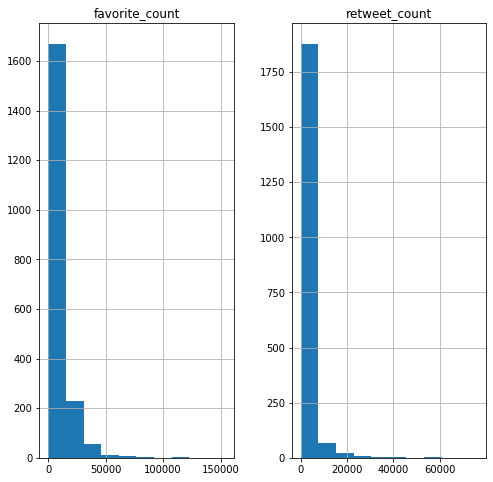

In [182]:
twitter_archive_master.hist(figsize=(8, 8));

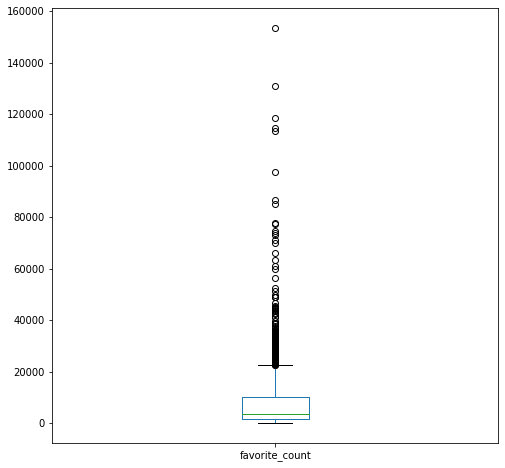

In [183]:
twitter_archive_master.favorite_count.plot(kind='box', figsize=(8,8));

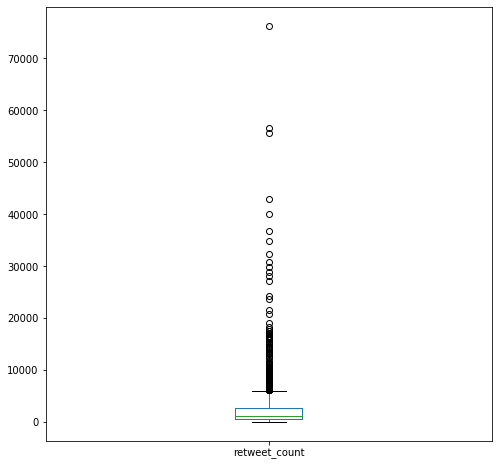

In [184]:
twitter_archive_master.retweet_count.plot(kind='box', figsize=(8,8));

C:\Users\Mr. X\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


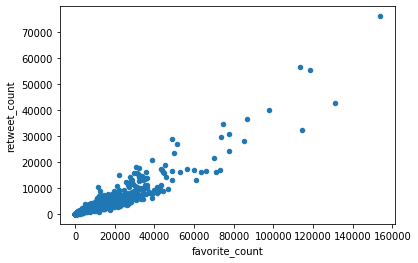

In [185]:
# showing the relation between  favorite_count and retweet_count
twitter_archive_master.plot('favorite_count', 'retweet_count', kind='scatter');

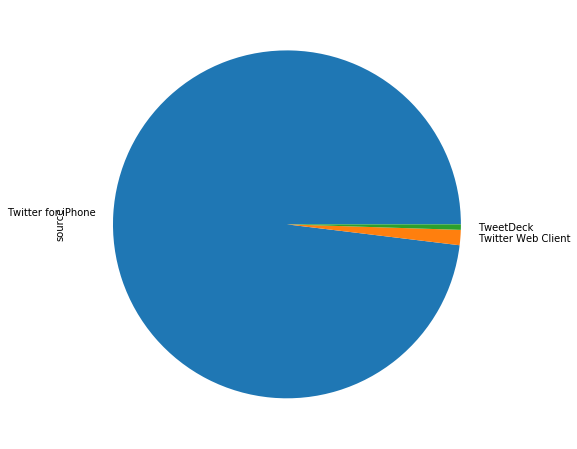

In [186]:
# showing the distribution of the source column
twitter_archive_master.source.value_counts().plot(kind='pie', figsize=(8,8));

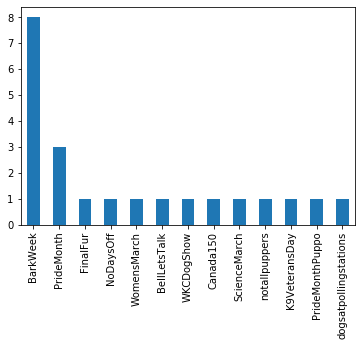

In [187]:
# show the distribution of hashtags used in tweets
twitter_archive_master.hashtag.value_counts().plot(kind='bar');

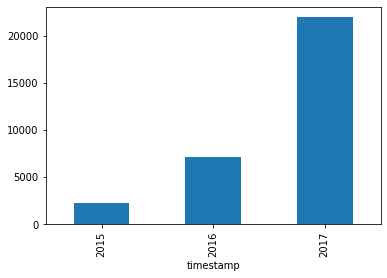

In [188]:
# showing the mean favorite count per year
mean_favorite_count_per_year = twitter_archive_master.groupby(twitter_archive_master.timestamp.dt.year)['favorite_count'].mean()
mean_favorite_count_per_year.plot(kind='bar');

### Second: lets explore dog_inf_master

In [189]:
dog_inf_master.rating.describe()

count    1982.000000
mean     1.147582   
std      3.971545   
min      0.100000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
Name: rating, dtype: float64

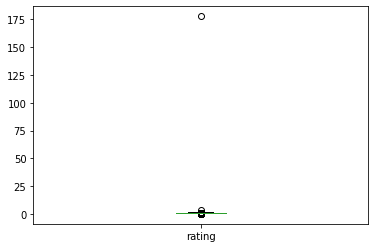

In [190]:
dog_inf_master.rating.plot(kind='box');

 It seems that only one dog had a much higher rating so i will choose to remove this outlier becaue it wil lead to misleading results

In [191]:
# removing dog information for the dog with rating equal to 177.6  from both datasets
its_id = dog_inf_master.query('rating == 177.6').tweet_id
dog_inf_master = dog_inf_master.query('rating != 177.6')
twitter_archive_master = twitter_archive_master[twitter_archive_master.tweet_id != str(its_id)]

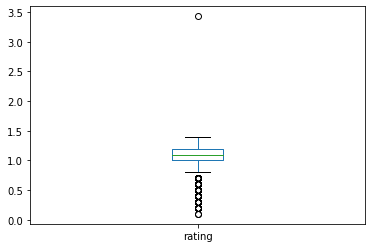

In [192]:
# testing the removal of the outlier
dog_inf_master.rating.plot(kind='box');

In [193]:
dog_inf_master.query('rating > 1.5')

,tweet_id,name,dog_stage,breed,confidence,rating
384,810984652412424192,Sam,NaN,golden_retriever,0.871342,3.428571


It seems there is one dog that had a rating above 1.5.but i will choose to keep it because it isn't much higher

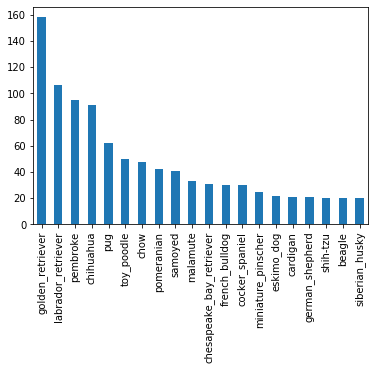

In [194]:
# showing the distribution of the top 20 dog breeds
dog_inf_master.breed.value_counts()[:20].plot(kind='bar');

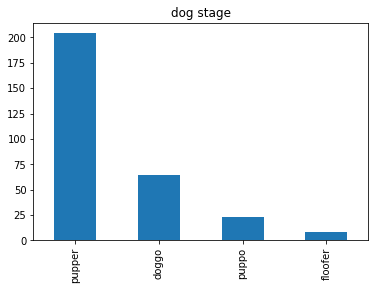

In [195]:
# showing the distribution of dog stage
dog_inf_master.dog_stage.value_counts().plot(kind='bar', title='dog stage');

# Drawing conclusions

## 1. what is the most frequent dog breeds?

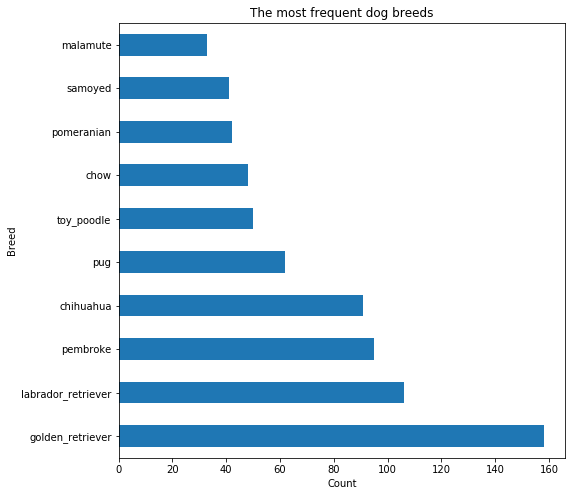

In [196]:
# the top 3 most frequent breeds
top_ten = dog_inf_master.breed.value_counts()[:10]
top_ten.plot(kind='barh', figsize=(8, 8), title='The most frequent dog breeds')
plt.xlabel('Count')
plt.ylabel('Breed')
plt.savefig('1.png'); 

### 2. What is the breed of the dog that had the highest  rating?

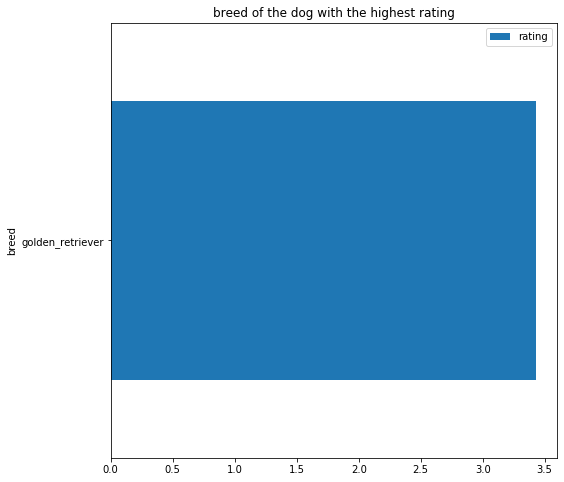

In [207]:
highest_rating = dog_inf_master.rating.max()
highest_rating_breed = dog_inf_master[dog_inf_master.rating == highest_rating]
fig_title = 'breed of the dog with the highest rating'
highest_rating_breed.plot('breed', 'rating', kind='barh', title= fig_title, figsize=(8,8))
plt.savefig('2.png')

The breed of the dog with highest rating is goldern retriever

### 3. What is the most frequent dog stage?

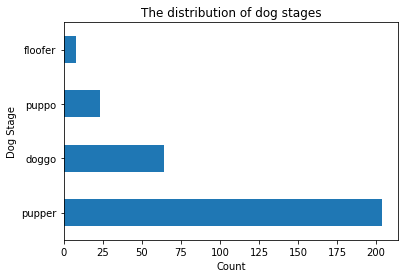

In [198]:
dog_inf_master.dog_stage.value_counts().plot(kind='barh')
plt.title('The distribution of dog stages')
plt.xlabel('Count')
plt.ylabel('Dog Stage')
plt.savefig('3.png')

It seems that `pupper` is the most frequent dog stage

### What is the relation between retweet_count and favorite count?

C:\Users\Mr. X\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


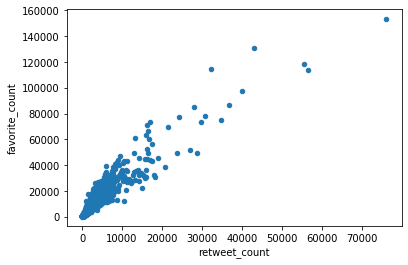

In [199]:
twitter_archive_master.plot('retweet_count', 'favorite_count', kind='scatter')
plt.savefig('4.png');


It seems that the relation is positive and strong

### How the retweet count and favorite count changed over time?

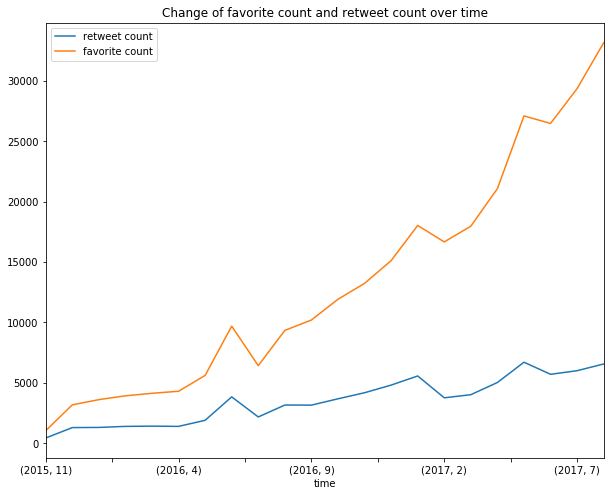

In [200]:
year = twitter_archive_master.timestamp.dt.year
month = twitter_archive_master.timestamp.dt.month
twitter_archive_master.groupby([year, month]).mean().retweet_count.plot(kind='line', figsize=(10,8))
twitter_archive_master.groupby([year, month]).mean().favorite_count.plot(kind='line')
plt.title('Change of favorite count and retweet count over time')
plt.xlabel('time')
plt.legend(('retweet count', 'favorite count'))
plt.savefig('5.png')

It seems that both are increasing but the favorite count is increasing with much higher rate

### What is the most active day of the week(the day inwhich the highest number of tweets were puplished)?

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


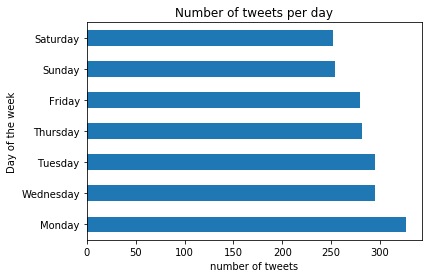

In [201]:
day = twitter_archive_master.timestamp.dt.day_name()
day.value_counts().plot('barh')
plt.title('Number of tweets per day')
plt.xlabel('number of tweets')
plt.ylabel('Day of the week')
plt.savefig('6.png')

It seems that all days of the week are very close but monday is slightly higher

### what is the mean rating for each dog_stage?

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


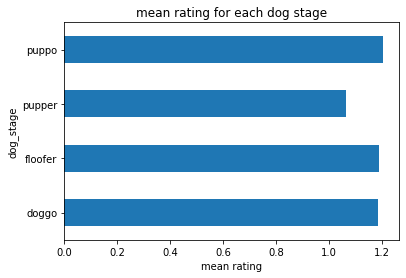

In [202]:
dog_inf_master.groupby('dog_stage').rating.mean().plot('barh')
plt.title('mean rating for each dog stage')
plt.xlabel('mean rating')
plt.savefig('7.png');

it seems that `puppo` had slightly more mean rating

### What is the most frequent names of dogs?

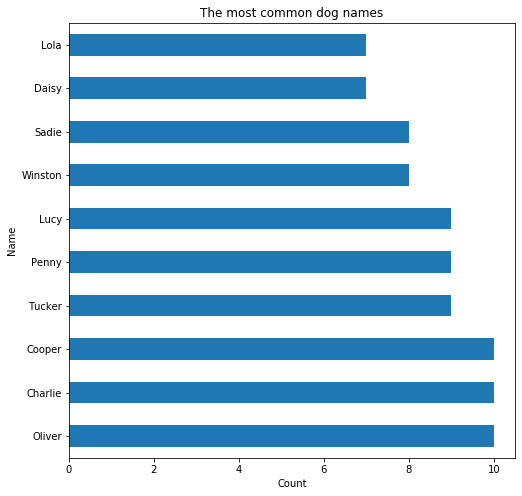

In [203]:
dog_inf_master.name.value_counts()[:10].plot(kind='barh', figsize=(8,8))
plt.title('The most common dog names')
plt.ylabel('Name')
plt.xlabel('Count')
plt.savefig('8.png');

### What is the most  used source?

C:\Users\Mr. X\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


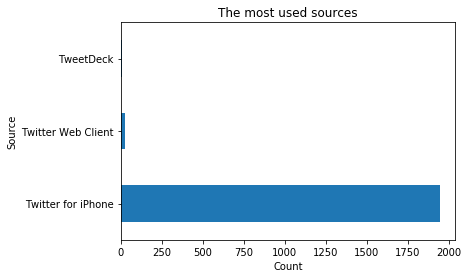

In [204]:
twitter_archive_master.source.value_counts().plot('barh')
plt.xlabel('Count')
plt.ylabel('Source')
plt.title('The most used sources')
plt.savefig('9.png');

It seems that twitter for iPhone is the most used

### What is the breeds that had the highest confidence?

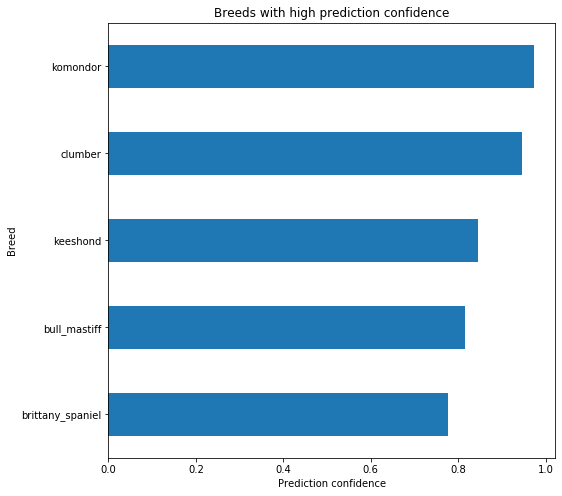

In [205]:
dog_inf_master.groupby('breed')['confidence'].mean().sort_values()[-5:].plot(kind='barh',figsize=(8,8))
plt.title('Breeds with high prediction confidence')
plt.xlabel('Prediction confidence')
plt.ylabel('Breed')
plt.savefig('10.png');

### What is the breeds that had the lowest confidence?

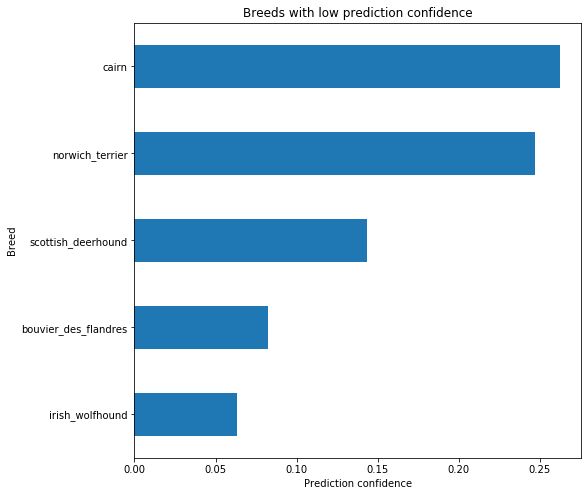

In [206]:
dog_inf_master.groupby('breed')['confidence'].mean().sort_values()[:5].plot(kind='barh',figsize=(8,8))
plt.title('Breeds with low prediction confidence')
plt.xlabel('Prediction confidence')
plt.ylabel('Breed')
plt.savefig('11.png');